# EDA - Exploratory Data Analysis

* Deciding which features are important
* Fixing data problems

* Step 1: Read the data
* Step 2: Understand data (numeric data - quantitative(continuous, discrete), non-numeric - qualitative(nominal, ordinal)) use shape, info, describe
* Step 3: Treat missing and duplicate values
* Step 4: Create subset of data
* Step 5: Feature scaling
* Step 6: Feature encoding (for categorical data only i.e. label encoding(ordinal), one Hot encoding(nominal))
* Step 7: Plot the data
* Step 8: Data Visualisation (matplotlib and seaborn)

Checking for multi-collinearity (visually):

* Bivariate analysis - 2 variables
* Multi-variate analysis - Multi variate

# **DATA EXPLORATION**

In [101]:
import pandas as pd                 #This is to read our datasets and manipulate them
import matplotlib.pyplot as plt     #This is to plot our variables
import seaborn as sns               #This is a popular alternative to matplotlib
import numpy as np                  #This is also for manipulation of datasets

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lesson 3/spacetrain.csv") #this is from the spaceship titanic Kaggle Competition
data
#Transported is the label column

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [104]:
data.shape #This shows you that the dataset has 8693 rows and 14 columns

(8693, 14)

In [105]:
data.info() #the info function reveals several things: missing data as well as wrong data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [106]:
data.describe() #The describe function gives you common statistics for numeric features only.
#Use data.describe(include = 'all') if you want to see all but this is not necessary

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [107]:
data.describe(include = 'all') #if you want to include all fields

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [108]:
data.describe(include = 'object') #you can specify by using include

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


# **MISSING VALUES**

Usually the first thing to check is missing values.  Why?  Without addressing missing values, there are a lot of things you can't do, including changing to correct data types or checking for outliers using matplotlib (although SNS is able to get around this).

In [109]:
data.isnull().sum() #This shows all the null values but with this you can't see the percentage

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [110]:
data.isnull().sum()/len(data) #this gives you the percentage but it has fields which are zero nulls and it's not sorted!

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [111]:
nulls = data.isnull().sum()/len(data) #save the earlier output into a variable
nulls[nulls > 0]                      #this will ask it to list output only for those which have nulls


HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
dtype: float64

In [112]:
nulls[nulls>0].sort_values(ascending = False) #take it a step further by sorting.  This is important when you have a gigantic dataset

CryoSleep       0.024963
ShoppingMall    0.023927
VIP             0.023352
HomePlanet      0.023122
Name            0.023007
Cabin           0.022892
VRDeck          0.021627
FoodCourt       0.021051
Spa             0.021051
Destination     0.020936
RoomService     0.020821
Age             0.020591
dtype: float64

In [113]:
nulls[(nulls>0) & (nulls<0.05)].sort_values(ascending = False)

CryoSleep       0.024963
ShoppingMall    0.023927
VIP             0.023352
HomePlanet      0.023122
Name            0.023007
Cabin           0.022892
VRDeck          0.021627
FoodCourt       0.021051
Spa             0.021051
Destination     0.020936
RoomService     0.020821
Age             0.020591
dtype: float64

In [114]:
nulls[(nulls>0.2)].sort_values(ascending = False)

Series([], dtype: float64)

# **TREATMENT OF MISSING VALUES**
- If less than 5% can remove row.
- If more than 20% can remove column.
- If more than 5% and numerical value, consider replacing null with mean, median. 
- If more than 5% and string value, consider replacing null with mode.
P.S. These are all guidelines and not a rule.

In [115]:
#Drop nulls in one column only
#data.drop(['RoomService'], axis=1) #(I'm not going to actually run this because this is not the treatment I want)
# In order to commit the action, I need to save a new data set by doing:
#data = data.drop(['RoomService'], axis=1)

In [116]:
#In this particular case all of the nulls are less than 5% and we can drop the rows from each column

In [117]:
#You can do this individually but if you have a large dataset it will be time consuming or you might miss something
# E.g. dropping the nulls in a singular column
# df.dropna(subset = ['column_name'])
# E.g. dropping multiple columns typed in
# df.dropna(subset = ['column1_name', 'column2_name', 'column3_name'])

In [118]:
#Remove them all without eyeballing
n1 = data.columns[data.isnull().sum()/len(data) <= 0.05].tolist() #0.05 as this is the guideline
n1

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [119]:
n2 = data.columns[data.isnull().sum()/len(data) > 0].tolist() #to filter those who have no nulls
n2

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

In [120]:
#Get the final list to drop
n = list(set(n1).intersection(n2))
n

['Age',
 'VRDeck',
 'CryoSleep',
 'RoomService',
 'ShoppingMall',
 'FoodCourt',
 'HomePlanet',
 'Cabin',
 'Destination',
 'Name',
 'VIP',
 'Spa']

In [121]:
#You can try putting them in one line instead of creating two separate lists
n = data.columns[data.isnull().sum()/len(data) <= 0.05].intersection(data.columns[data.isnull().sum()/len(data) > 0])
n

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'],
      dtype='object')

In [122]:
todroprow = data.columns[(nulls <= 0.05) & (nulls > 0)].tolist()
todroprow

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

In [123]:
#Another way of putting them in one line using operand & and setting different lists for different treatments
#Here, todroprow sets the condition that the nulls falls between above 0% and less than 5%
todroprow = data.columns[(data.isnull().sum()/len(data) <= 0.05) & (data.isnull().sum()/len(data) > 0)].tolist()
todroprow

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

In [124]:
todropcol = data.columns[data.isnull().sum()/len(data) > 0.2].tolist()
todropcol #there isn't any columns that have more than 20% nulls which is why it shows as an empty list

[]

In [125]:
#Let's drop the null rows now
data = data.dropna(subset = todroprow)

In [126]:
len(data)

6606

In [127]:
#In future if you come across situations where you'll need to replace the nulls with mean, median or mode you can use these codes:
#replace with mean
#data['column_name'] = data.fillna(data['column_name'].mean())
#data['column_name'] = data['column_name'].fillna(data['column_name'].median())
#data['column_name'] = data['column_name'].fillna(data['column_name'].mode())
#OR
# data.fillna(data['column_name'].mean()), inplace = True

# **DATATYPES**

* Check to see that datatypes are correct as the remaining checks on wrong categories and outliers and skew depend on this being treated for the dataset.

In [128]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [129]:
data.dtypes #They seem to be correct

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

# **TREATMENT OF DATATYPES**

In [130]:
#If there is a need to change datatypes for other datasets you can use the astype command.
# Change for one or multiple columns e.g. data = data.astype({'Col1': 'float64', 'Col2': 'object'})
# See documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
# By default, if there is decimal place, python reads the column as float automatically instead of integer

In [ ]:
#data = data.astype({'Col1': 'float64', 'Col2': 'object'})

# **DUPLICATES**

* Check for duplicates.  Duplicates make the algorithm more inaccurate because it increases data points with a particular characteristic making the algo pay more attention to that when it should not be doing so.
* Usually we drop duplicates when the record is the same across all the columns.  If you check on one specific column, you might drop records that are not duplicates.

In [131]:
len(data)

6606

In [132]:
data.duplicated() #This shows you how many rows are unique out of the original 8692

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689    False
8690    False
8691    False
8692    False
Length: 6606, dtype: bool

# **TREATMENT OF DUPLICATES**

In [133]:
data = data.drop_duplicates()

In [134]:
len(data) #left with non duplicates

6606

# **SEPARATE THE COLUMNS ACCORDING TO DATATYPES**

* We do this because the checks on numerical columns are different from categorical columns

* We check numerical columns for outliers

* We check categorical columns for unknown or wrong values e.g. Height shows x kg instead of cm

* ALSO, for SKLEARN algorithms, it cannot tolerate string values so all strings have to be converted to numerical values

In [135]:
#We call the data columns with numerical values datanum
datanum = data.select_dtypes(['int','float64']) #common mistake: datanum = data.select_dtypes('int','float64')
datanum

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


In [136]:
#We call the string columns datastr
datastr = data.select_dtypes(['object'])
datastr

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre


# **Checking for Outliers (DATANUM)**

Due to there being many different treatments for outliers please also read this article: https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

In [137]:
#We can visualize outliers using boxplot

In [138]:
datanum.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


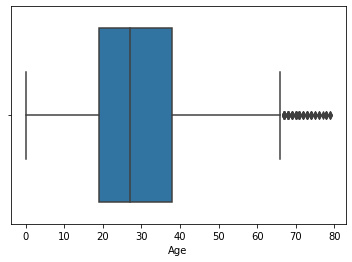

In [139]:
sns.boxplot(datanum['Age']) 
#You can do this individually.  SNS seaborn can handle missing values in boxplot for matplotlib you need to ask it to ignore missing values

At this point there are a couple of things to take note of:
* You can possibly plot the boxplots all together but you might get something like the plot below.
* You can possibly scale them (Min-Max, Z-scaler) so you can plot them together but if you do that before investigating the outliers, you do not know if 1 is for 800 years in age or for 80.
* So it might be a good time to revisit the data.describe()

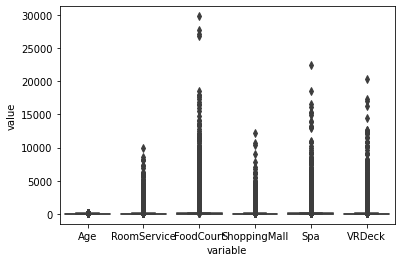

In [140]:
sns.boxplot(x="variable", y="value", data=pd.melt(datanum)) #Or you can do for all but this is not advised if the values are very different in range

Check the Maximum and Minimums for each columns. Are they reasonable? You can possibly make a judgment for Age but maybe a bit hard for the rest without context or information so you'll have to decide.  In the industry, most machine learning engineers use ensemble method, which means you try a whole host of algorithms and also with or without certain treatments to see if it makes a difference.  This helps them with their judgment call but for this course we will use our best judgment.

* Age looks reasonable so we won't remove outliers
* Let's see the box plots for the rest.

In [141]:
datanum.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [142]:
dataoutlier = datanum[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
#common mistake: dataoutlier = datanum['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
#Or you can simply put dataoutlier = datanum.drop(['Age'], axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


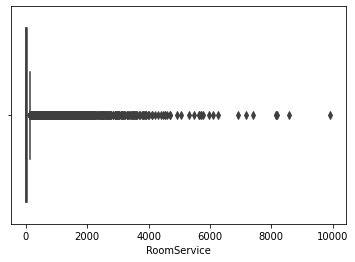

In [143]:
sns.boxplot(dataoutlier['RoomService'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


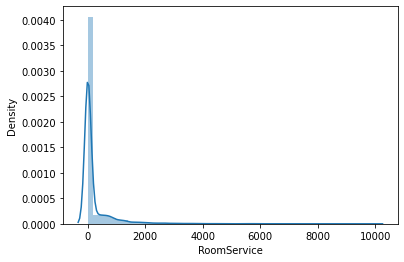

In [144]:
sns.distplot(dataoutlier['RoomService'])

In [145]:
dataoutlier['RoomService'].mean()

222.99167423554346

In [146]:
dataoutlier['RoomService'].median() #interestingly, there are a lot of people on the spaceship who don't use roomservice

0.0

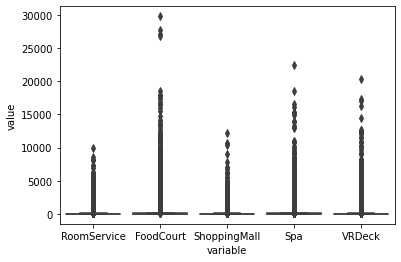

In [147]:
sns.boxplot(x="variable", y="value", data=pd.melt(dataoutlier))

In [148]:
#Let's remove our outliers. Outliers are those that are more than IQR*1.5 away from the 50th percentile
#First let's find the outliers.  We write a generic function to be used across the columns:

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers


In [149]:
find_outliers_IQR(dataoutlier['RoomService']) #these are where your outliers are.  And you have 1431 outliers

4        303.0
13       719.0
20       412.0
31      1125.0
33       214.0
         ...  
8632     757.0
8644     745.0
8661     699.0
8682     240.0
8692     126.0
Name: RoomService, Length: 1431, dtype: float64

# **TREATMENT OF OUTLIERS**

In [150]:
#Let's move the outliers to the lower and upper limit
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = np.where(df > upper, upper, np.where(df < lower,lower,df ))

   return df

In [151]:
#You also can use:
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = q3+1.5*IQR
   lower = q1-1.5*IQR
   df = np.where(df > upper, upper, np.where(df < lower,lower,df ))

   return df

In [152]:
q1=datanum['Age'].quantile(0.25)
q3=datanum['Age'].quantile(0.75)
IQR=q3-q1
datanum['Age'][~(datanum['Age']>(q3+1.5*IQR))].max()

66.0

In [153]:
q3 + 1.5*IQR

66.5

In [154]:
datanum.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [155]:
impute_outliers_IQR(dataoutlier['RoomService'])

array([  0. , 109. ,  43. , ...,   0. ,   0. , 122.5])

In [156]:
#Let's put the corrected figures back into the ORIGINAL DATANUM dataset
datanum['RoomService'] = impute_outliers_IQR(datanum['RoomService'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [157]:
#Let's do for the rest 'FoodCourt','ShoppingMall','Spa','VRDeck'
datanum['FoodCourt'] = impute_outliers_IQR(datanum['FoodCourt'])
datanum['ShoppingMall'] = impute_outliers_IQR(datanum['ShoppingMall'])
datanum['Spa'] = impute_outliers_IQR(datanum['Spa'])
datanum['VRDeck'] = impute_outliers_IQR(datanum['VRDeck'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

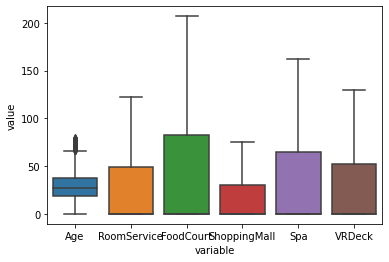

In [158]:
sns.boxplot(x="variable", y="value", data=pd.melt(datanum)) #Let's relook at the box plots... looks a lot better now

# **SKEW and NORMALISATION**

* SKEW is to address non-normal distributions.  Skewed distributions throw accuracy off
* NORMALISATION is to address large ranges. Different ranges fool the algorithm into thinking some variables are more important
* Always address SKEW before Normalisation because you cannot log 0 or -ve values

In [159]:
datanum.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.000,0.0,0.0,0.0
1,24.0,109.0,9.000,25.0,162.5,44.0
2,58.0,43.0,206.875,0.0,162.5,49.0
3,33.0,0.0,206.875,75.0,162.5,130.0
4,16.0,122.5,70.000,75.0,162.5,2.0


In [160]:
#If you face a huge dataset you can't keep eyeballing for skew.  So you need to throw up a search for skew using the skew() function
datanum.skew(axis = 0) #anything over 0.5 is considered high skew
#Why axis = 0 instead of 1 since we're testing for skew in a column? axis = 0 means find skew along the column headers (index axis)

Age             0.407835
RoomService     1.170224
FoodCourt       1.185632
ShoppingMall    1.190686
Spa             1.176799
VRDeck          1.193868
dtype: float64

In [161]:
#Isolate only high skew columns
skewlist = datanum.columns[datanum.skew(axis = 0)>0.5].tolist() #only take the high skew(0.5)
skewlist

['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# **TREATMENT OF SKEW**

In [162]:
#treat skew in skewlist columns
for i in datanum:
  if i in skewlist:
    datanum[i] = np.log1p(datanum[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [163]:
datanum.skew(axis = 0) #skew is not so strong now

Age             0.407835
RoomService     0.897073
FoodCourt       0.864290
ShoppingMall    0.926636
Spa             0.822657
VRDeck          0.879433
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


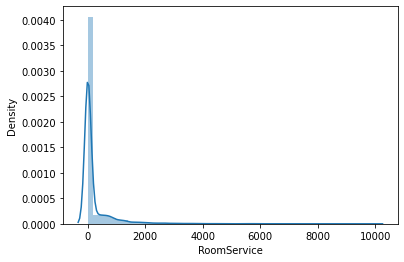

In [164]:
sns.distplot(data['RoomService'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


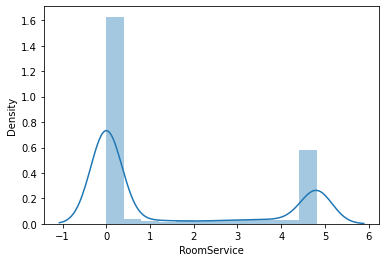

In [165]:
sns.distplot(datanum['RoomService']) #the distribution has changed

In [166]:
#Now let's check the range
datanum.describe() #seems like the skew treatment has helped with the 4 skewed items but it doesn't help with range

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,1.409572,1.592531,1.245612,1.562089,1.441490
std,14.533429,2.072536,2.294013,1.848969,2.186141,2.085592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,3.912023,4.427823,3.433987,4.189655,3.970292
max,79.000000,4.816241,5.336937,4.330733,5.096813,4.875197


# **TREATMENT OF DIFFERENT RANGES**

In [167]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [168]:
from pandas import DataFrame #the scaler converts the dataframe into an array so you need to use this to convert it back to dataframe
datanumscaled = DataFrame(scaler.fit_transform(datanum))

In [169]:
datanumscaled.describe()

,0,1,2,3,4,5
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,0.365747,0.292671,0.298398,0.287621,0.306484,0.295678
std,0.183967,0.430322,0.429837,0.426941,0.428923,0.427796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240506,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.481013,0.812256,0.829656,0.792934,0.822015,0.814386
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [170]:
datanum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           6606 non-null   float64
 1   RoomService   6606 non-null   float64
 2   FoodCourt     6606 non-null   float64
 3   ShoppingMall  6606 non-null   float64
 4   Spa           6606 non-null   float64
 5   VRDeck        6606 non-null   float64
dtypes: float64(6)
memory usage: 361.3 KB


In [171]:
datanumscaled.columns =['Age', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa','VRDeck']

In [172]:
datanumscaled.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,0.365747,0.292671,0.298398,0.287621,0.306484,0.295678
std,0.183967,0.430322,0.429837,0.426941,0.428923,0.427796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240506,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.481013,0.812256,0.829656,0.792934,0.822015,0.814386
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **CHECKING FOR WRONG, TOO MANY VALUES OR INCORRECT VALUES IN DATASTR**

In [173]:
#Count of unique values in each categorical column.  IF there are too many unique values it becomes unhelpful
datastr.nunique() #count the number of unique values in each column

PassengerId    6606
HomePlanet        3
CryoSleep         2
Cabin          5305
Destination       3
VIP               2
Name           6590
dtype: int64

In [174]:
datastr['Cabin'].value_counts() #are we able to group these?  If we can't, should we remove this column? It's a judgment call

G/1476/S    7
E/13/S      7
C/137/S     7
G/734/S     7
B/11/S      7
           ..
E/233/S     1
E/209/P     1
G/548/S     1
D/108/P     1
B/153/P     1
Name: Cabin, Length: 5305, dtype: int64

In [175]:
#Drop names and cabin
datastr = datastr.drop(['Cabin','Name','PassengerId'], axis = 1)

In [176]:
datastr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HomePlanet   6606 non-null   object
 1   CryoSleep    6606 non-null   object
 2   Destination  6606 non-null   object
 3   VIP          6606 non-null   object
dtypes: object(4)
memory usage: 258.0+ KB


In [177]:
datastr.dtypes

HomePlanet     object
CryoSleep      object
Destination    object
VIP            object
dtype: object

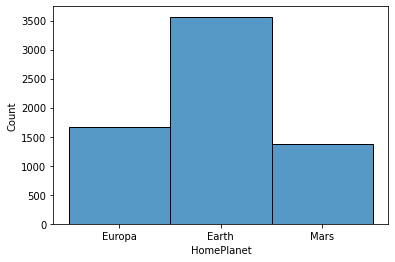

In [178]:
#Now let's check out the rest of the columns
sns.histplot(datastr['HomePlanet']) #use distplot for numerical columns, use histogram for categorical columns

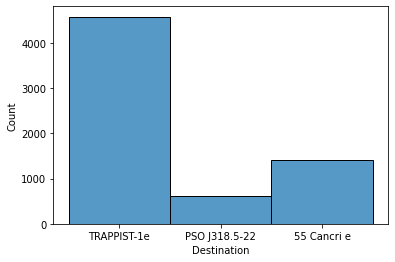

In [179]:
sns.histplot(datastr['Destination'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


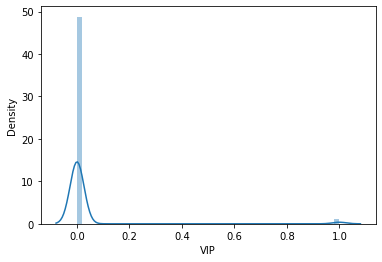

In [180]:
sns.distplot(datastr['VIP'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


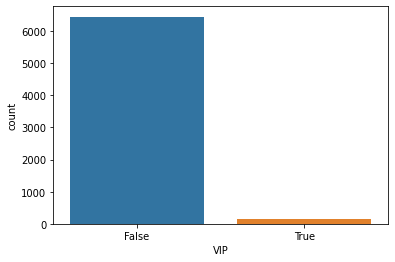

In [181]:
sns.countplot(datastr['VIP'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


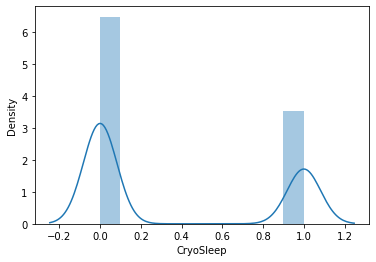

In [182]:
sns.distplot(datastr['CryoSleep'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


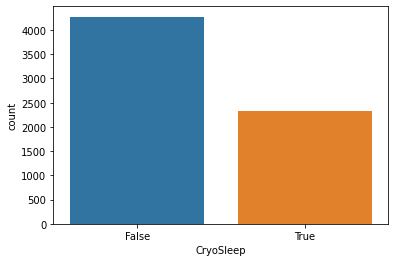

In [183]:
sns.countplot(datastr['CryoSleep'])

When you have a large dataset it's not possible to visualize everything so you have to rely on iterating through value_counts

In [184]:
datastr.value_counts() #value_counts looks for counts of unique values

HomePlanet  CryoSleep  Destination    VIP  
Earth       False      TRAPPIST-1e    False    1809
Mars        False      TRAPPIST-1e    False     684
Earth       True       TRAPPIST-1e    False     637
Europa      False      TRAPPIST-1e    False     550
Mars        True       TRAPPIST-1e    False     448
Earth       False      55 Cancri e    False     388
Europa      True       TRAPPIST-1e    False     354
                       55 Cancri e    False     344
            False      55 Cancri e    False     306
Earth       True       PSO J318.5-22  False     289
            False      PSO J318.5-22  False     279
            True       55 Cancri e    False     164
Mars        False      55 Cancri e    False      90
            True       55 Cancri e    False      62
            False      TRAPPIST-1e    True       45
Europa      False      55 Cancri e    True       44
                       TRAPPIST-1e    True       41
Mars        False      PSO J318.5-22  False      23
Europa      True    

In [185]:
datastr['VIP'].value_counts() #this is getting for a particular column but it's time consuming to check through one by one

False    6444
True      162
Name: VIP, dtype: int64

In [186]:
#So use a loop to check through all string columns
for i in datastr:
  print([i], datastr[i].value_counts().index)

['HomePlanet'] Index(['Earth', 'Europa', 'Mars'], dtype='object')
['CryoSleep'] Index([False, True], dtype='object')
['Destination'] Index(['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22'], dtype='object')
['VIP'] Index([False, True], dtype='object')


In [187]:
#What if you meet a ? value that is not a null?
# E.g. data['horsepower'] = data['horsepower'].astype('int64') #can't run cos of question mark

In [188]:
#data[data['horsepower']=='?'] #see where the question marks are

In [189]:
#data['horsepower'] = data['horsepower'].replace(["?"],np.nan) #replace with null value

In [190]:
#data['horsepower'] = data['horsepower'].astype('float64') #after change ?to null, change all to float
#mean_hp = data['horsepower'].mean() #find mean from dataset with nulls
#data['horsepower'] = data['horsepower'].fillna(mean_hp) #fillNAN with mean value


# **TIME TO ENCODE STRING COLUMNS**

Why is this necessary?

For SKLEARN Algorithms, it cannot run on STRING values so all STRING columns must be encoded into NUMERICAL values.  There are several methods to do this but the most efficient and simplest way is to use the get_dummies() function.

One Hot Encoding involves transforming the dataset from df to array and back again which is troublesome.

Label Encoding may trick the computer into thinking a higher numbered label is more important than a lower numbered label

In [191]:
encoding_datastr = datastr #need to be in array form or it will not be encoded if left as a list
encoded_datastr = pd.get_dummies(data = encoding_datastr)
encoded_datastr.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0,1,0,1,0,0,0,1,1,0
1,1,0,0,1,0,0,0,1,1,0
2,0,1,0,1,0,0,0,1,0,1
3,0,1,0,1,0,0,0,1,1,0
4,1,0,0,1,0,0,0,1,1,0


# **FINALLY TIME TO COMBINE EVERYTHING**

In [192]:
encoded_datastr.reset_index(inplace = True)
datanumscaled.reset_index(inplace = True)

In [193]:
combined_data = pd.concat([encoded_datastr, datanumscaled], axis=1, join = 'outer')
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6606 entries, 0 to 6605
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      6606 non-null   int64  
 1   HomePlanet_Earth           6606 non-null   uint8  
 2   HomePlanet_Europa          6606 non-null   uint8  
 3   HomePlanet_Mars            6606 non-null   uint8  
 4   CryoSleep_False            6606 non-null   uint8  
 5   CryoSleep_True             6606 non-null   uint8  
 6   Destination_55 Cancri e    6606 non-null   uint8  
 7   Destination_PSO J318.5-22  6606 non-null   uint8  
 8   Destination_TRAPPIST-1e    6606 non-null   uint8  
 9   VIP_False                  6606 non-null   uint8  
 10  VIP_True                   6606 non-null   uint8  
 11  index                      6606 non-null   int64  
 12  Age                        6606 non-null   float64
 13  RoomService                6606 non-null   float

# **Visualisation**

Sometimes we need to run some graphs and visually look for collinearity although we can also iterate through and calculate this.

If you face a huge dataset with many hundreds and thousands of columns this might not be possible so you can try using PCA which helps with dimensionality reduction by removing columns with too much collinearity.

# Bivariate

In [194]:
datanum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           6606 non-null   float64
 1   RoomService   6606 non-null   float64
 2   FoodCourt     6606 non-null   float64
 3   ShoppingMall  6606 non-null   float64
 4   Spa           6606 non-null   float64
 5   VRDeck        6606 non-null   float64
dtypes: float64(6)
memory usage: 619.3 KB


In [195]:
Age = datanum['Age'].values
RoomService = data['RoomService'].values
FoodCourt = data['FoodCourt'].values
ShoppingMall = data['ShoppingMall'].values
Spa = data['Spa'].values
VRDeck = data['VRDeck'].values


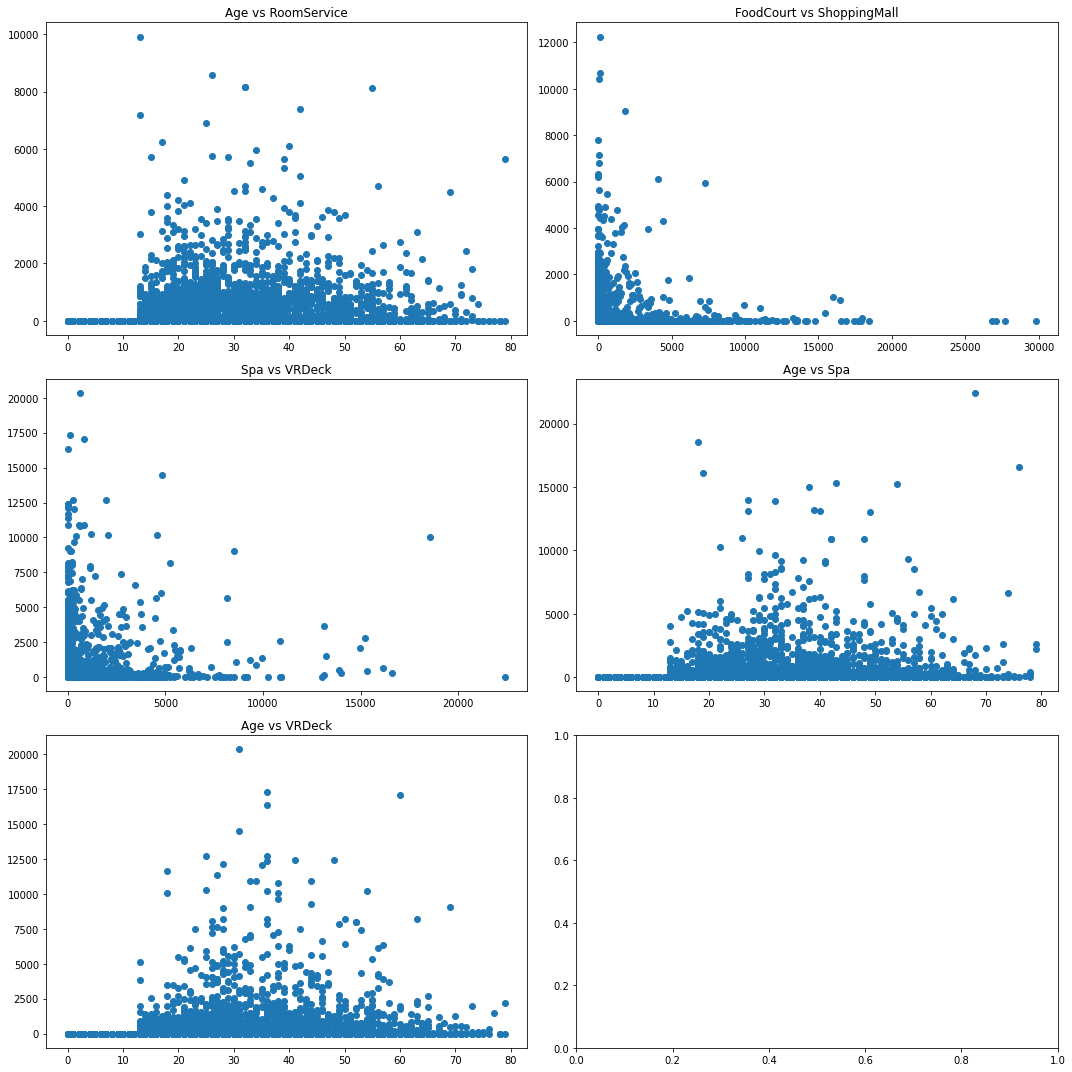

In [196]:
#another way of doing subplot for matplotlib graphs only, not seaborn
fig,ax = plt.subplots(3,2,figsize=(15,15)) #create 6 plots, 2 plots per row
ax[0,0].scatter(Age,RoomService)
ax[0,0].set_title('Age vs RoomService');
ax[0,1].scatter(FoodCourt,ShoppingMall)
ax[0,1].set_title('FoodCourt vs ShoppingMall');
ax[1,0].scatter(Spa,VRDeck)
ax[1,0].set_title('Spa vs VRDeck');
ax[1,1].scatter(Age,Spa)
ax[1,1].set_title('Age vs Spa');
ax[2,0].scatter(Age,VRDeck)
ax[2,0].set_title('Age vs VRDeck');
plt.tight_layout() #end the graph here

# Multivariate

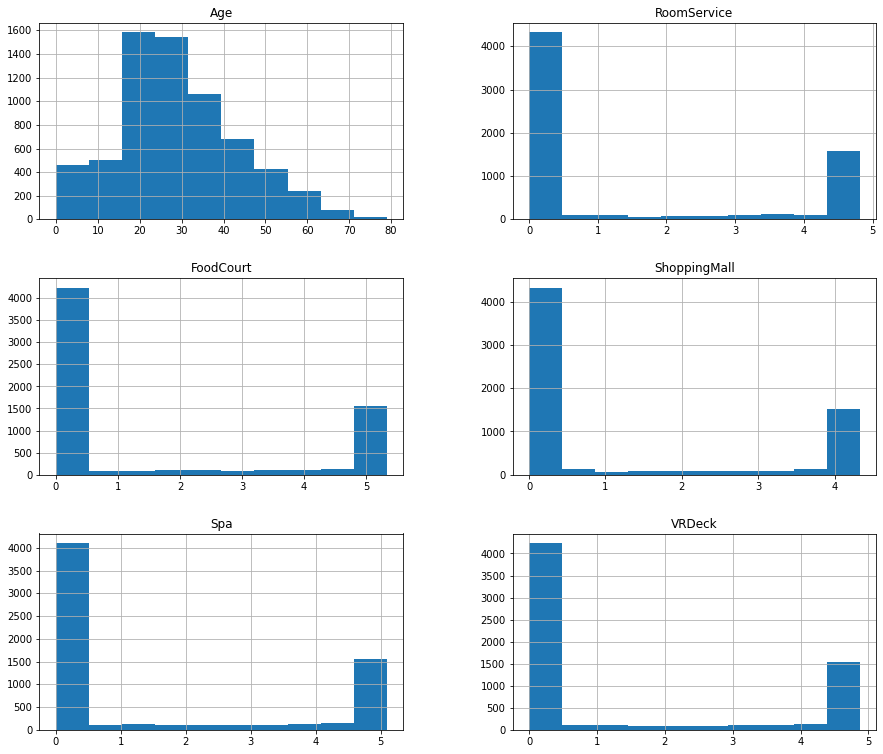

In [197]:
datanum.hist(figsize=(15,13)); #histogram everything

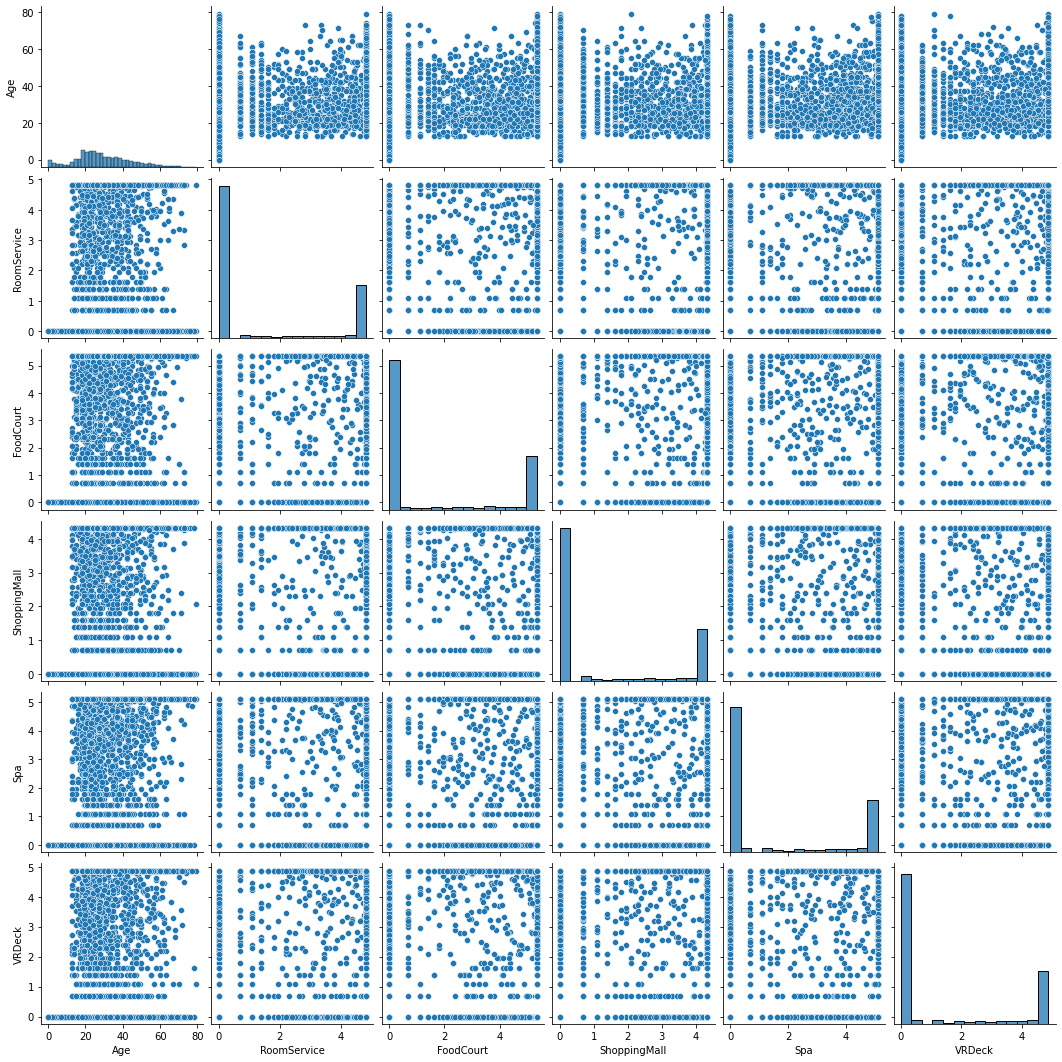

In [198]:
sns.pairplot(datanum); #pair everything

# **CORRELATION TABLE**

In [199]:
data.corr() ##correlation

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.074783,0.135844,0.042314,0.123820,0.105031,-0.082553
RoomService,0.074783,1.000000,-0.013614,0.060478,0.012472,-0.026002,-0.247291
FoodCourt,0.135844,-0.013614,1.000000,-0.012320,0.215995,0.216997,0.055025
ShoppingMall,0.042314,0.060478,-0.012320,1.000000,0.022168,0.000383,0.011602
Spa,0.123820,0.012472,0.215995,0.022168,1.000000,0.149447,-0.219854
VRDeck,0.105031,-0.026002,0.216997,0.000383,0.149447,1.000000,-0.207950
Transported,-0.082553,-0.247291,0.055025,0.011602,-0.219854,-0.207950,1.000000


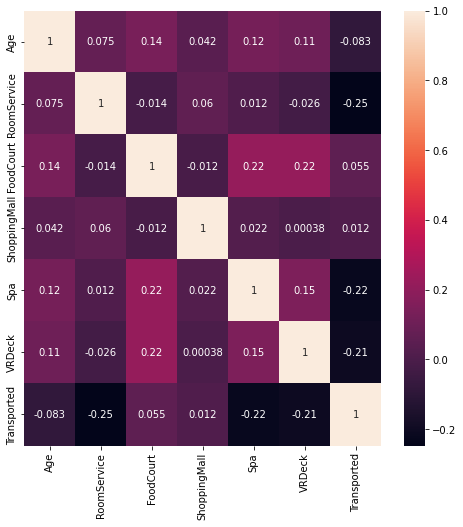

In [200]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot = True) #correlation, display in heat map and also annotate
plt.show()